In [2]:
! pip install simpletransformers

     |████████████████████████████████| 221 kB 9.5 MB/s 
     |████████████████████████████████| 1.6 MB 17.2 MB/s 
     |████████████████████████████████| 264 kB 59.3 MB/s 
     |████████████████████████████████| 124 kB 58.1 MB/s 
     |████████████████████████████████| 3.3 MB 60.1 MB/s 
     |████████████████████████████████| 2.6 MB 58.8 MB/s 
     |████████████████████████████████| 8.0 MB 61.8 MB/s 
     |████████████████████████████████| 1.2 MB 56.0 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 895 kB 59.3 MB/s 
     |████████████████████████████████| 636 kB 58.8 MB/s 
     |████████████████████████████████| 170 kB 68.8 MB/s 
     |████████████████████████████████| 133 kB 76.4 MB/s 
     |████████████████████████████████| 97 kB 8.6 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 243 kB 66.1 MB/s 
     |████████████████████████████████| 118 kB 79.0 MB/s 
     |███████████████

In [3]:
import pandas as pd 

df = pd.read_csv("/content/dft.csv")
df.head()

FileNotFoundError: ignored

In [4]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [4]:
url = 'https://raw.githubusercontent.com/Jhagrut/Twitter-Project/main/Models/dft.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [5]:
df.head()

,Unnamed: 0,injury_report,tweet,kfold
0,0,0,hard https feeling nizbtc7jet,0
1,1,0,https x5cvdrbye staff number pitching put,0
2,2,0,well go tatis oxrycgvpom denver https join siz...,0
3,3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,4,0,single time jakecrousemlb read,0


In [6]:
print(set(df['injury_report'].values))

{0, 1}


In [7]:
df.injury_report = pd.Categorical(df.injury_report)
df['injury_report'] = df['injury_report'].cat.codes
df = df.dropna()

In [8]:
df_new = df[["tweet", "injury_report"]]

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, random_state=91)

In [10]:
from simpletransformers.classification import ClassificationModel

In [11]:
df_new

,tweet,injury_report
0,hard https feeling nizbtc7jet,0
1,https x5cvdrbye staff number pitching put,0
2,well go tatis oxrycgvpom denver https join siz...,0
3,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,single time jakecrousemlb read,0
...,...,...
14922,line kind craig game counsell libka brewer cle...,0
14923,increase completely sweat initially usage earl...,0
14924,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,0
14925,2lt3lkdopw go week https mlb amp throw play,0


In [12]:
# set use_cuda=False on CPU-only platforms
bert = ClassificationModel('distilbert', 'distilbert-base-uncased', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 3,
})
bert.train_model(train)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/11195 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1400 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm


Running Epoch 1 of 3:   0%|          | 0/1400 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1400 [00:00<?, ?it/s]

(4200, 0.09610135035851965)

In [13]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#others
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.special import softmax

In [14]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=sklearn.metrics.accuracy_score)
print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3732 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/467 [00:00<?, ?it/s]

{'mcc': 0.8741335346482049, 'tp': 230, 'tn': 3441, 'fp': 31, 'fn': 30, 'auroc': 0.9830052507975895, 'auprc': 0.8952722593230135, 'acc': 0.9836548767416935, 'eval_loss': 0.08576880845319025}


In [15]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=confusion_matrix)
result

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3732 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/467 [00:00<?, ?it/s]

{'acc': array([[3441,   31],
        [  30,  230]]),
 'auprc': 0.8952722593230135,
 'auroc': 0.9830052507975895,
 'eval_loss': 0.08576880845319025,
 'fn': 30,
 'fp': 31,
 'mcc': 0.8741335346482049,
 'tn': 3441,
 'tp': 230}

In [16]:
cm = result["acc"]

recall = np.mean(np.diag(cm) / np.sum(cm, axis = 1))
precision = np.mean(np.diag(cm) / np.sum(cm, axis = 0))

print(precision, recall)

0.9362915056444696 0.9378434065934066


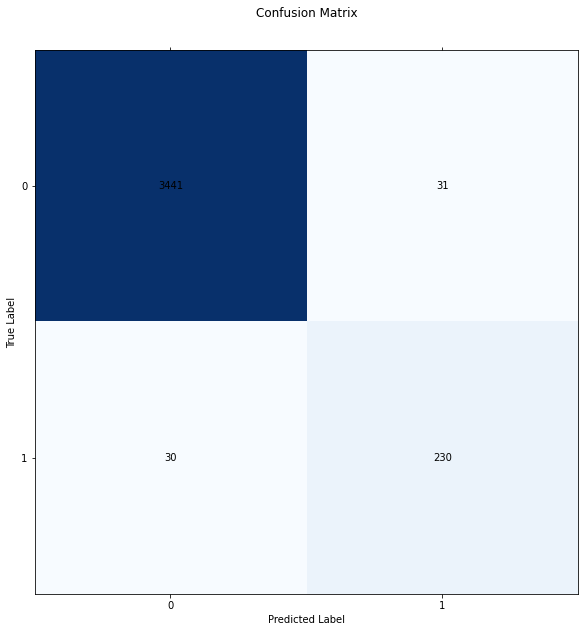

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

intersection_matrix = cm

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(2):
    for j in range(2):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 2))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 2, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [22]:
df[df['injury_report']==0]

,Unnamed: 0,injury_report,tweet,kfold
0,0,0,hard https feeling nizbtc7jet,0
1,1,0,https x5cvdrbye staff number pitching put,0
2,2,0,well go tatis oxrycgvpom denver https join siz...,0
3,3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,4,0,single time jakecrousemlb read,0
...,...,...,...,...
14922,14922,0,line kind craig game counsell libka brewer cle...,4
14923,14923,0,increase completely sweat initially usage earl...,4
14924,14924,0,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,4
14925,14925,0,2lt3lkdopw go week https mlb amp throw play,4


In [21]:
df[df['injury_report']==1]

,Unnamed: 0,injury_report,tweet,kfold
15,15,1,chavis sox go spot arroyo optione activate baz...,0
18,18,1,play pitch strasburg go mound erick catch fedd...,0
51,51,1,undergo soon home wrist procedure recovery ale...,0
61,61,1,go cahill roster day correspond trevor,0
63,63,1,scratch lineup come change marlin personal fie...,0
...,...,...,...,...
14892,14892,1,covid possibly depend testing player rapid tes...,4
14897,14897,1,eickhoff waiver assignment surgery undergo roo...,4
14906,14906,1,long close martinez go strasburg assignment pi...,4
14908,14908,1,reinforcement long optioned arrive erick nat k...,4


In [23]:
df

,Unnamed: 0,injury_report,tweet,kfold
0,0,0,hard https feeling nizbtc7jet,0
1,1,0,https x5cvdrbye staff number pitching put,0
2,2,0,well go tatis oxrycgvpom denver https join siz...,0
3,3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,4,0,single time jakecrousemlb read,0
...,...,...,...,...
14922,14922,0,line kind craig game counsell libka brewer cle...,4
14923,14923,0,increase completely sweat initially usage earl...,4
14924,14924,0,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,4
14925,14925,0,2lt3lkdopw go week https mlb amp throw play,4


In [24]:
13866/14297

0.9698538154857662